In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

In [3]:
img = Image.open(r'C:\Desktop\maj\AiArtData\350.jpg')
img.show()

In [4]:
image = cv2.imread(r'C:\Desktop\maj\AiArtData\350.jpg')
image.shape

(194, 260, 3)

In [5]:
img = Image.open(r'C:\Desktop\maj\RealArt\350.jpg')
img.show()

In [6]:
image = cv2.imread(r'C:\Desktop\maj\RealArt\350.jpg')
image.shape

(1067, 1920, 3)

In [7]:
fake_path_train = r'C:\Desktop\maj\AiArtData'
real_path_train = r'C:\Desktop\maj\RealArt'

fake_path_test = r'C:\Desktop\maj\AiArtData'
real_path_test = r'C:\Desktop\maj\RealArt'

In [8]:
def get_X_and_y(fake_path, real_path):
    X = []
    y = []

    print("No.of FAKE images present: ", len(os.listdir(fake_path)))
    print("No.of REAL images present: ", len(os.listdir(real_path)))

    for file in os.listdir(fake_path):
        img_path = os.path.join(fake_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32, 32)) / 255
        X.append(resized)
        y.append(0)

    for file in os.listdir(real_path):
        img_path = os.path.join(real_path, file)
        img = cv2.imread(img_path)
        resized = cv2.resize(img, (32, 32)) / 255
        X.append(resized)
        y.append(1)

    X = np.array(X)
    y = np.array(y)
    print("No.of images present in X: ", len(X))

    return X, y


In [9]:
X_train, y_train = get_X_and_y(fake_path_train, real_path_train)

No.of FAKE images present:  539
No.of REAL images present:  436
No.of images present in X:  975


In [10]:
X_test, y_test = get_X_and_y(fake_path_test, real_path_test)

No.of FAKE images present:  539
No.of REAL images present:  436
No.of images present in X:  975


In [11]:
X_train[0].shape, y_train[0]

((32, 32, 3), 0)

In [12]:
import keras
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\balaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(X_train, y_train, epochs=15)


Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5381 - loss: 0.6915
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5951 - loss: 0.6689
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6218 - loss: 0.6489
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6798 - loss: 0.6255
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5919 - loss: 0.6595
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7038 - loss: 0.5889
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6852 - loss: 0.5845
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7159 - loss: 0.5626
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7307 - loss: 0.5375
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7190 - loss: 0.5506
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7883 - loss: 0.4489
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

In [15]:
model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9330 - loss: 0.2071


[0.2749570906162262, 0.8953846096992493]

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred_prob]
y_pred[:5]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[0, 0, 0, 0, 0]

In [17]:
from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       539
           1       0.92      0.83      0.88       436

    accuracy                           0.90       975
   macro avg       0.90      0.89      0.89       975
weighted avg       0.90      0.90      0.89       975



In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

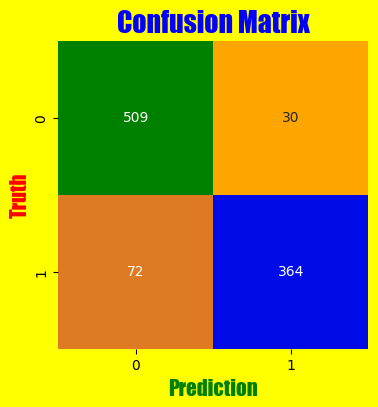

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colors = ["orange", "purple", "blue", "green"]  
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.figure(figsize=(4, 4), facecolor='yellow', edgecolor='brown')
sn.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, cbar=False)
plt.xlabel('Prediction', fontdict={'family': 'fantasy', 'color': 'green', 'size': 15})
plt.ylabel('Truth', fontdict={'family': 'fantasy', 'color': 'red', 'size': 15})
plt.title('Confusion Matrix', fontdict={'family': 'fantasy', 'color': 'blue', 'size': 20})
plt.show()


In [20]:
tf.keras.models.save_model(model, 'ai_vs_real_model.hdf5')

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9330 - loss: 0.2071
Accuracy: 89.54%
